In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split


In [2]:
loan=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data', index_col=0)

In [3]:
loan.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
loan = loan.rename(columns = {"ZIP Code": "ZIP_Code"})

In [5]:
loan.head()

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
loan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP_Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [8]:
loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [9]:
#from describe we see that experience in negative which is improper
loan[loan.Experience < 0]['Experience'].count()

52

In [10]:
exp=loan.Experience<0

In [11]:
#loan['Experience'].where(loan['Experience']<0 , np.nan)
#loan[loan.Experience < 0]['Experience'].count()
#data_frame.where(data_frame < 0, 0)
loan.Experience.value_counts()
loan['Experience']=loan['Experience'].replace([-1,-2,-3],[1,2,3])
#loan['Experience'].value_counts()


In [12]:
loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [13]:
loan = loan.drop('ZIP_Code', axis=1)

In [14]:
loan.shape

(5000, 12)

In [15]:
# dropping duplicates from the dataset
loan = loan.drop_duplicates(keep='first')

In [16]:
loan.shape

(4987, 12)

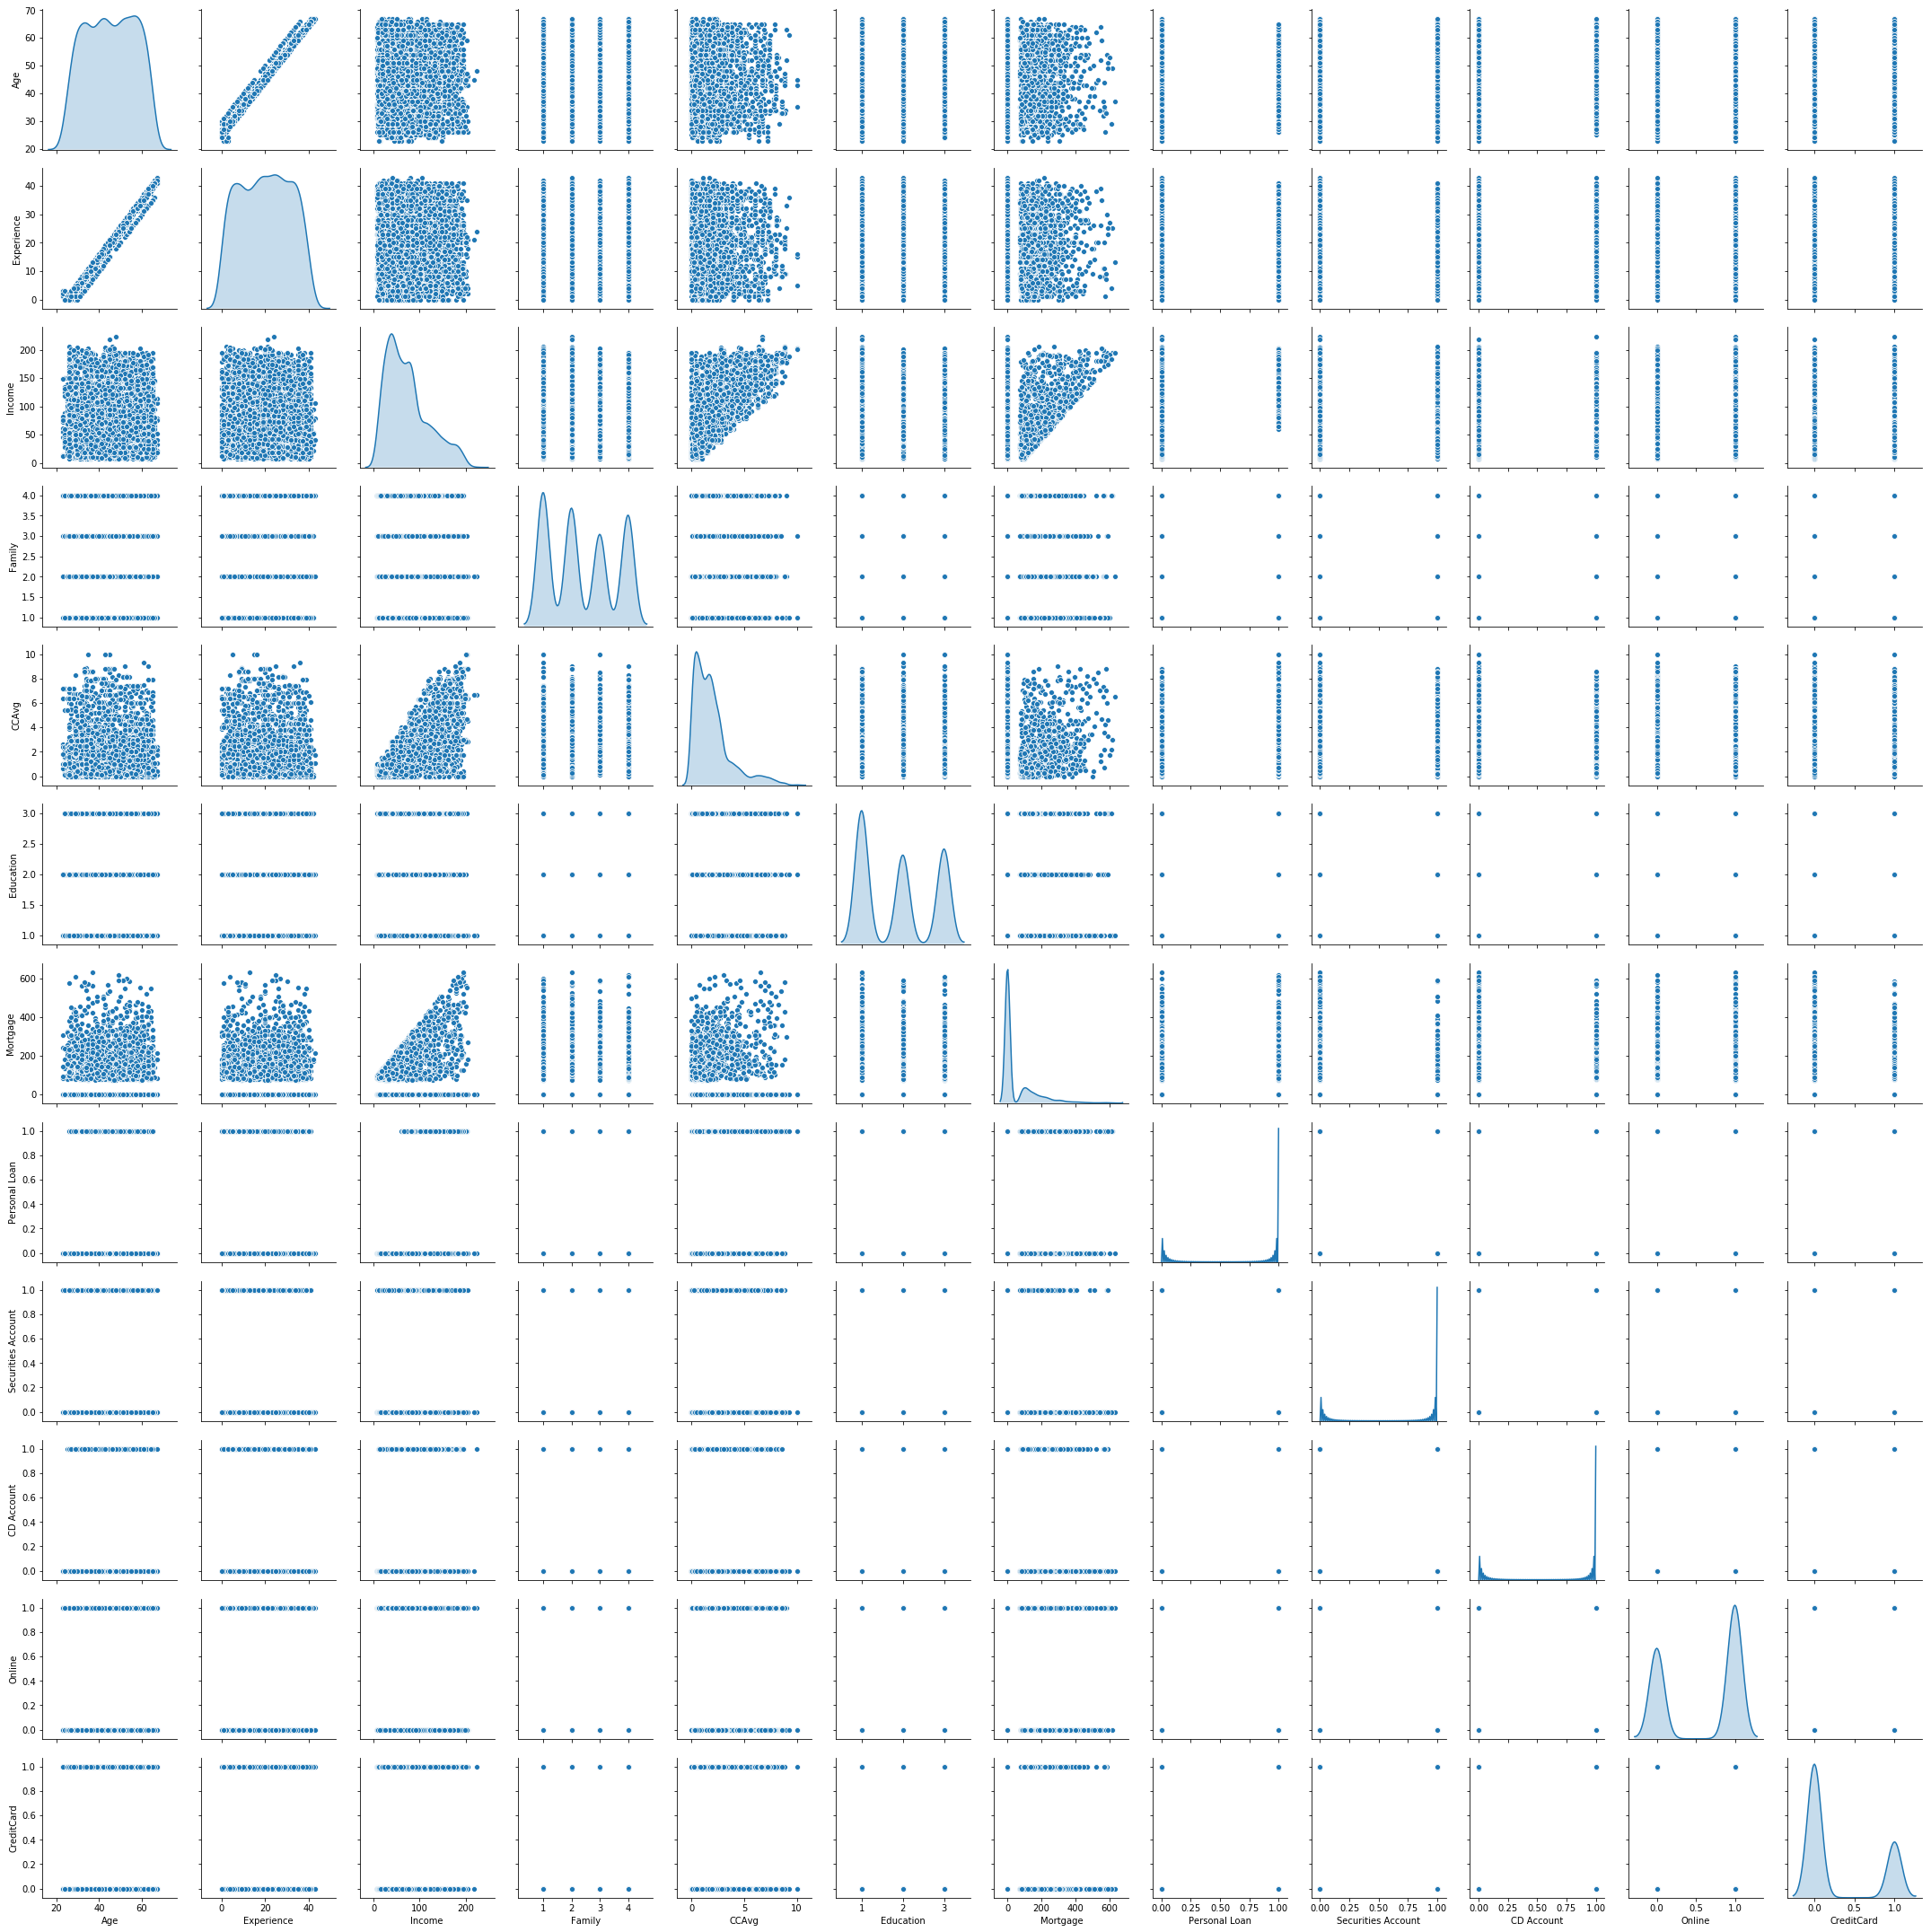

In [17]:
sns.pairplot(loan, diag_kind='kde')

In [18]:
shapiro(loan.Age)

#though the data seems to be normal, we see that the p value is very less. Which implies that the data is not normally distributed

(0.9618845582008362, 2.512204308028746e-34)

In [19]:
print(shapiro(loan.Experience))
print(shapiro(loan.Income))
print(shapiro(loan.CCAvg))
print(shapiro(loan.Mortgage))

(0.9613966345787048, 1.6687006711529958e-34)
(0.9283432960510254, 1.0089348943138683e-43)
(0.8475988507270813, 0.0)
(0.6290397644042969, 0.0)


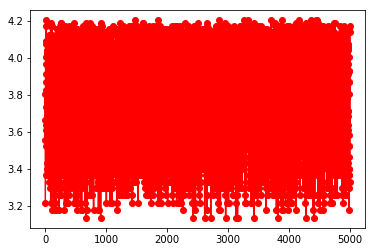

In [20]:
log_age=np.log(loan.Age) 
plot.plot(log_age,  
         color = 'red', marker = "o") 
plot.show() 
  

In [21]:
shapiro(log_age)

(0.9528274536132812, 2.2841299493147093e-37)

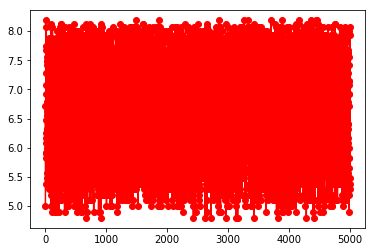

In [22]:
sq_age=np.sqrt(loan.Age)
plot.plot(sq_age,  
         color = 'red', marker = "o") 
plot.show() 

In [23]:
shapiro(sq_age)

(0.960188627243042, 6.166058487097564e-35)

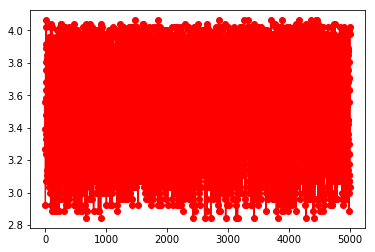

In [24]:
cb_age=np.cbrt(loan.Age)
plot.plot(cb_age,  
         color = 'red', marker = "o") 
plot.show() 

In [25]:
shapiro(cb_age)

(0.9583806395530701, 1.4514303137337625e-35)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


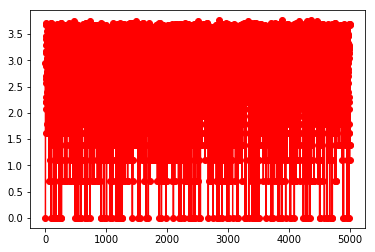

In [26]:
log_exp=np.log(loan.Experience)
plot.plot(log_exp,  
         color = 'red', marker = "o") 
plot.show() 


In [27]:
loan.corr().transpose()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993997,-0.056897,-0.045533,-0.052540,0.042356,-0.013014,-0.008003,-0.000715,0.007849,0.013989,0.006381
Experience,0.993997,1.000000,-0.048591,-0.051000,-0.050278,0.014945,-0.011605,-0.008604,-0.001290,0.009529,0.014404,0.007503
Income,-0.056897,-0.048591,1.000000,-0.157922,0.646073,-0.186847,0.206420,0.502513,-0.002992,0.169589,0.014646,-0.003479
Family,-0.045533,-0.051000,-0.157922,1.000000,-0.109812,0.066145,-0.020595,0.061398,0.019957,0.014081,0.009907,0.012018
CCAvg,-0.052540,-0.050278,0.646073,-0.109812,1.000000,-0.135299,0.109166,0.366672,0.014573,0.136244,-0.002727,-0.007404
Education,0.042356,0.014945,-0.186847,0.066145,-0.135299,1.000000,-0.032256,0.137618,-0.010132,0.014475,-0.015633,-0.010307
Mortgage,-0.013014,-0.011605,0.206420,-0.020595,0.109166,-0.032256,1.000000,0.141700,-0.005909,0.088987,-0.005266,-0.007930
Personal Loan,-0.008003,-0.008604,0.502513,0.061398,0.366672,0.137618,0.141700,1.000000,0.021670,0.316210,0.006718,0.002399
Securities Account,-0.000715,-0.001290,-0.002992,0.019957,0.014573,-0.010132,-0.005909,0.021670,1.000000,0.316883,0.013096,-0.015466
CD Account,0.007849,0.009529,0.169589,0.014081,0.136244,0.014475,0.088987,0.316210,0.316883,1.000000,0.176414,0.278559


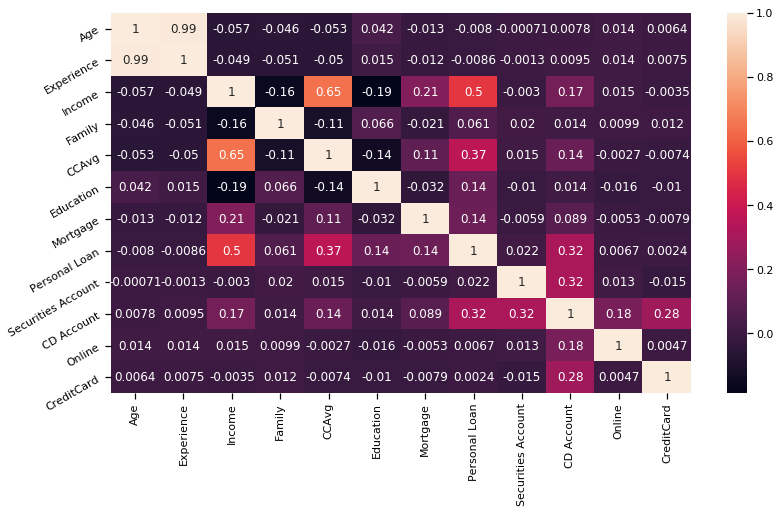

In [28]:
# Correlation with heat map
corr = loan.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plot.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, annot=True)
x = a.set_xticklabels(a.get_xticklabels(), rotation=90)
y = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [29]:
x=loan.drop(['Experience','Personal_Loan'],axis=1)
y=loan['Personal_Loan']

KeyError: "['Personal_Loan'] not found in axis"

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
print(xtrain.shape)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logis_loan=LogisticRegression()

In [ ]:
model_fit=logis_loan.fit(xtrain,ytrain)
y_pred=model_fit.predict(xtrain)

In [ ]:
#training accuracy
from sklearn.metrics import accuracy_score
print('my accuracy score is : \n', accuracy_score(ytrain,y_pred))

In [ ]:
#testing accuracy
model_fit1=logis_loan.fit(xtrain,ytrain)
y_pred1=model_fit1.predict(xtest)
print('my accuracy score is : \n', accuracy_score(ytest,y_pred1))

# Decision Tree

In [ ]:
from sklearn import tree
model_tree=tree.DecisionTreeClassifier()

In [ ]:
#training accuracy
model_fittree=model_tree.fit(xtrain,ytrain)
y_predtree=model_fittree.predict(xtrain)
print('my accuracy score is : \n', accuracy_score(ytrain,y_predtree))

In [ ]:
#testing accuracy
model_fittree1=model_tree.fit(xtrain,ytrain)
y_predtree1=model_fittree1.predict(xtest)
print('my accuracy score is : \n', accuracy_score(ytest,y_predtree1))

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_naive=MultinomialNB()

In [ ]:
#training accuracy
model_fitnaive=model_naive.fit(xtrain,ytrain)
y_prednaive=model_fitnaive.predict(xtrain)
print('my accuracy score is : \n', accuracy_score(ytrain,y_prednaive))

In [ ]:
#Testing accuracy
model_fitnaive1=model_naive.fit(xtrain,ytrain)
y_prednaive1=model_fitnaive1.predict(xtest)
print('my accuracy score is : \n', accuracy_score(ytest,y_prednaive1))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
#training accuracy
model_fitknn=model_knn.fit(xtrain,ytrain)
y_predknn=model_fitknn.predict(xtrain)
print('my accuracy score is : \n', accuracy_score(ytrain,y_predknn))

In [ ]:
#training accuracy
model_fitknn1=model_knn.fit(xtrain,ytrain)
y_predknn1=model_fitknn1.predict(xtest)
print('my accuracy score is : \n', accuracy_score(ytest,y_predknn1))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rand=RandomForestClassifier()

In [ ]:
#training accuracy
model_fitrand=model_rand.fit(xtrain,ytrain)
y_predrand=model_fitrand.predict(xtrain)
print('my accuracy score is : \n', accuracy_score(ytrain,y_predknn))

In [ ]:
#training accuracy
model_fitrand1=model_rand.fit(xtrain,ytrain)
y_predrand1=model_fitrand1.predict(xtest)
print('my accuracy score is : \n', accuracy_score(ytest,y_predrand1))